k-means聚类

创建k个点作为初始的质心点（随机选择）

当任意一个点的簇分配结果发生改变时

对数据集中的每一个数据点

对每一个质心

计算质心与数据点的距离

将数据点分配到距离最近的簇

对每一个簇，计算簇中所有点的均值，并将均值作为质心

In [1]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([
    [2,2,8,5,7,6,1,4,3,1,4,6,9,1],
    [10,5,4,8,5,4,2,9,10,2,5,7,2,1]
])

points_center = np.array([
        [2, 5, 1],
        [10, 8, 2]
    ], dtype = float)


In [2]:
def getDistance(x, y, x1, y1):
    dis = np.sqrt((x1-x)*(x1-x)+(y1-y)*(y1-y))
    return dis

In [3]:

points_last_res = []

while(True):
    
    points_res = []

    points_type = np.zeros((points.shape[1], 2), dtype = float)

    ##辨别各个点到质心距离并分类

    for i in range(points.shape[1]):
        x1 = points[0][i]
        y1 = points[1][i]
        min_dis = 9999
        min_pos = 0
        for j in range(points_center.shape[1]):
            x = points_center[0][j]
            y = points_center[1][j]
            dis = getDistance(x, y, x1, y1)
            if(dis < min_dis):
                min_dis = dis
                min_pos = j
        points_type[i][0] = min_pos
        points_type[i][1] = min_dis
    for i in range(points.shape[1]):
        points_res.append(points_type[i][0])
    print(points_res)
    
    #循环控制：本次分类与上次一致时结束循环
    if(points_last_res == points_res):
        break;
    else:
        points_last_res = points_res

    
    #重新选择质心

    for i in range(points_center.shape[1]):
        sumx = 0
        sumy = 0
        coun = 0
        for j in range(points_type.shape[0]):
            if(i == points_type[j][0]):
                sumx += points[0][j]
                sumy += points[1][j]
                coun = coun + 1
        points_center[0, i] = sumx/coun
        points_center[1, i] = sumy/coun


[0.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 0.0, 2.0, 1.0, 1.0, 1.0, 2.0]
[0.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.0, 0.0, 2.0, 1.0, 1.0, 1.0, 2.0]
[0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 2.0, 0.0, 0.0, 2.0, 1.0, 1.0, 1.0, 2.0]
[0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 2.0, 0.0, 0.0, 2.0, 1.0, 1.0, 1.0, 2.0]


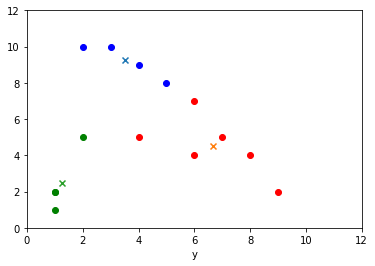

In [4]:
#绘图

plt.rcParams['axes.unicode_minus'] = False

plt.xlabel('X')
plt.xlabel('y')
plt.xlim(xmax=12,xmin=0)
plt.ylim(ymax=12,ymin=0)

for i in range(points_type.shape[0]):
    if(points_type[i][0] == 0):
        plt.scatter(points[0][i], points[1][i], c='b')
    if(points_type[i][0] == 1):
        plt.scatter(points[0][i], points[1][i], c='r')
    if(points_type[i][0] == 2):
        plt.scatter(points[0][i], points[1][i], c='g')
for j in range(points_center.shape[1]):
    plt.scatter(points_center[0][j], points_center[1][j], marker='x')
